In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [2]:
db = load_diabetes()
df_X=db.data
df_y=db.target

In [3]:
na_df_X=np.array(df_X)
na_df_y=np.array(df_y)

In [4]:
df_X= pd.DataFrame(db.data, columns = db.feature_names)
df_X["target"]=df_y

In [5]:
db.feature_names.append("target")

In [6]:
db.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']

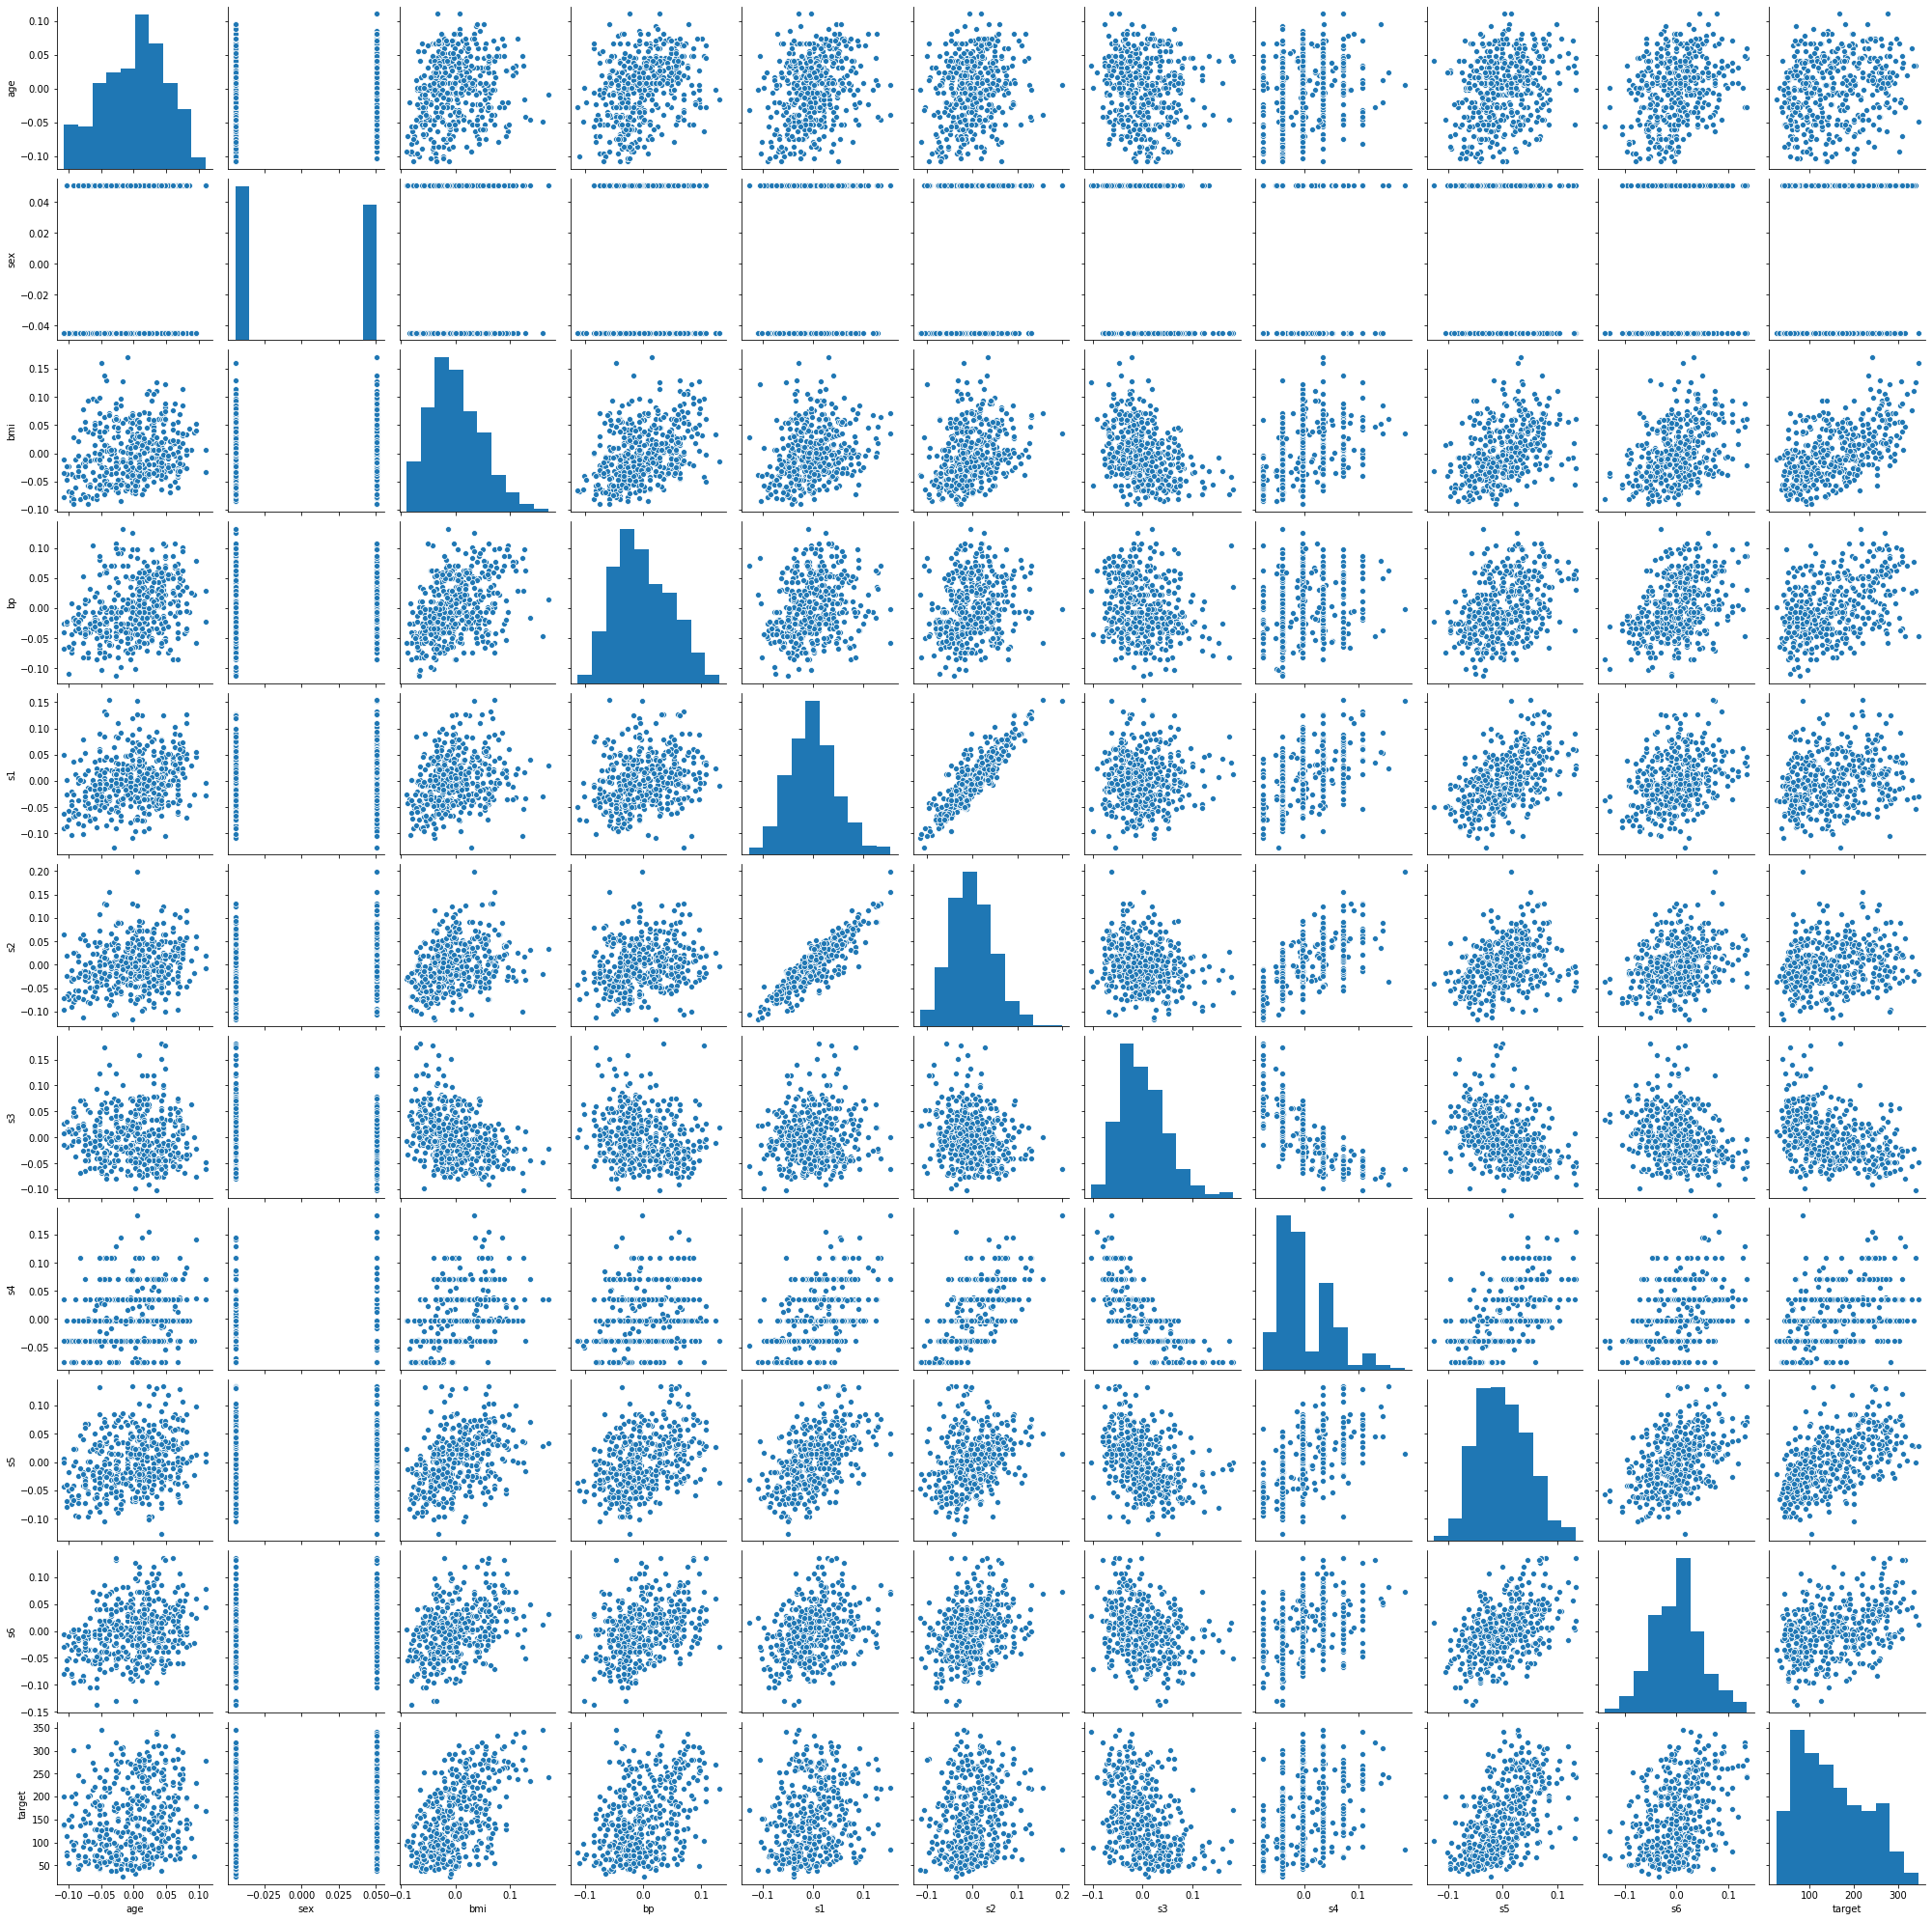

In [7]:
sns.pairplot(df_X[db.feature_names])

In [8]:
df_X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [9]:
# del df_X["age"]
# del df_X["sex"]
del df_X["bmi"]
del df_X["bp"]
# del df_X["s1"]
# del df_X["s2"]
del df_X["s3"]
del df_X["s4"]
# del df_X["s5"]
del df_X["s6"]

del df_X["target"]
df_X=np.array(df_X)
df_y=np.array(df_y)
print(np.shape(df_X))
print(np.shape(df_y))

(442, 5)
(442,)


In [10]:
train_X,test_X,train_Y,test_Y = train_test_split(df_X,
                                                df_y,
                                                test_size=0.2,
                                                random_state=10)

In [11]:
FL=np.shape(df_X)[1]
print(FL)
#W,B
W=np.random.rand(FL)
b=np.random.rand()

5


In [12]:
#model
def model(X,W,b):
    pred=0
    for i in range(FL):
        pred += X[:,i]*W[i]
    pred+=b
    return pred

In [13]:
np.shape(model(train_X,W,b))

(353,)

In [14]:
#MSE
def MSE(a,b):
    mse=((a-b)**2).mean()
    return mse

def loss(X,W,b,y):
    pred=model(X,W,b)
    L= MSE(pred,y)
    return L

In [15]:
#gradient
def gradient(X,W,b,y):
    N=len(X)
    
    y_pred=model(X,W,b)
    
    dw=1/N*2*X.T.dot(y_pred-y)
    db=2*(y_pred-y).mean()
    
    return dw,db

In [16]:
#hyper parameter
learning_rate=0.1

In [17]:
#train
def train_MSE(X,Y,w,b):
    
    losses=[]
    
    for i in range(1,20001):
        dw,db= gradient(X,w,b,Y)
        w-=learning_rate*dw
        b-=learning_rate*db
        L=loss(X,w,b,Y)
        losses.append(L)
        if i%10==0:
            print('iteration %d: loss %0.4f' %(i,L))
            
def train_RMSE(X,Y,w,b):
    
    losses=[]
    
    for i in range(1,1001):
        dw,db= gradient(X,w,b,Y)
        w-=learning_rate*dw
        b-=learning_rate*db
        L=loss(X,w,b,Y)
        L=L**0.5
        losses.append(L)
        if i%10==0:
            print('iteration %d: loss %0.4f' %(i,L))

In [18]:
train_MSE(train_X,train_Y,W,b)
print(' ')
# train_RMSE(train_X,train_Y,W,b)

iteration 10: loss 6085.0148
iteration 20: loss 5796.6582
iteration 30: loss 5770.6729
iteration 40: loss 5748.0912
iteration 50: loss 5725.9202
iteration 60: loss 5704.1181
iteration 70: loss 5682.6776
iteration 80: loss 5661.5918
iteration 90: loss 5640.8539
iteration 100: loss 5620.4573
iteration 110: loss 5600.3954
iteration 120: loss 5580.6620
iteration 130: loss 5561.2508
iteration 140: loss 5542.1556
iteration 150: loss 5523.3705
iteration 160: loss 5504.8896
iteration 170: loss 5486.7072
iteration 180: loss 5468.8176
iteration 190: loss 5451.2153
iteration 200: loss 5433.8949
iteration 210: loss 5416.8510
iteration 220: loss 5400.0786
iteration 230: loss 5383.5724
iteration 240: loss 5367.3274
iteration 250: loss 5351.3389
iteration 260: loss 5335.6020
iteration 270: loss 5320.1119
iteration 280: loss 5304.8642
iteration 290: loss 5289.8541
iteration 300: loss 5275.0774
iteration 310: loss 5260.5298
iteration 320: loss 5246.2068
iteration 330: loss 5232.1044
iteration 340: loss

iteration 2950: loss 4132.7389
iteration 2960: loss 4131.5845
iteration 2970: loss 4130.4366
iteration 2980: loss 4129.2952
iteration 2990: loss 4128.1602
iteration 3000: loss 4127.0316
iteration 3010: loss 4125.9093
iteration 3020: loss 4124.7932
iteration 3030: loss 4123.6834
iteration 3040: loss 4122.5798
iteration 3050: loss 4121.4823
iteration 3060: loss 4120.3909
iteration 3070: loss 4119.3055
iteration 3080: loss 4118.2261
iteration 3090: loss 4117.1527
iteration 3100: loss 4116.0851
iteration 3110: loss 4115.0234
iteration 3120: loss 4113.9675
iteration 3130: loss 4112.9173
iteration 3140: loss 4111.8728
iteration 3150: loss 4110.8340
iteration 3160: loss 4109.8009
iteration 3170: loss 4108.7733
iteration 3180: loss 4107.7512
iteration 3190: loss 4106.7347
iteration 3200: loss 4105.7236
iteration 3210: loss 4104.7179
iteration 3220: loss 4103.7176
iteration 3230: loss 4102.7226
iteration 3240: loss 4101.7329
iteration 3250: loss 4100.7485
iteration 3260: loss 4099.7692
iteratio

iteration 6210: loss 3939.1190
iteration 6220: loss 3938.8109
iteration 6230: loss 3938.5036
iteration 6240: loss 3938.1971
iteration 6250: loss 3937.8914
iteration 6260: loss 3937.5865
iteration 6270: loss 3937.2825
iteration 6280: loss 3936.9792
iteration 6290: loss 3936.6767
iteration 6300: loss 3936.3750
iteration 6310: loss 3936.0741
iteration 6320: loss 3935.7740
iteration 6330: loss 3935.4746
iteration 6340: loss 3935.1760
iteration 6350: loss 3934.8782
iteration 6360: loss 3934.5811
iteration 6370: loss 3934.2848
iteration 6380: loss 3933.9892
iteration 6390: loss 3933.6944
iteration 6400: loss 3933.4003
iteration 6410: loss 3933.1070
iteration 6420: loss 3932.8144
iteration 6430: loss 3932.5226
iteration 6440: loss 3932.2314
iteration 6450: loss 3931.9410
iteration 6460: loss 3931.6514
iteration 6470: loss 3931.3624
iteration 6480: loss 3931.0742
iteration 6490: loss 3930.7866
iteration 6500: loss 3930.4998
iteration 6510: loss 3930.2137
iteration 6520: loss 3929.9282
iteratio

iteration 9400: loss 3866.7074
iteration 9410: loss 3866.5309
iteration 9420: loss 3866.3545
iteration 9430: loss 3866.1783
iteration 9440: loss 3866.0023
iteration 9450: loss 3865.8265
iteration 9460: loss 3865.6509
iteration 9470: loss 3865.4754
iteration 9480: loss 3865.3002
iteration 9490: loss 3865.1252
iteration 9500: loss 3864.9503
iteration 9510: loss 3864.7757
iteration 9520: loss 3864.6012
iteration 9530: loss 3864.4270
iteration 9540: loss 3864.2529
iteration 9550: loss 3864.0790
iteration 9560: loss 3863.9053
iteration 9570: loss 3863.7317
iteration 9580: loss 3863.5584
iteration 9590: loss 3863.3852
iteration 9600: loss 3863.2123
iteration 9610: loss 3863.0395
iteration 9620: loss 3862.8669
iteration 9630: loss 3862.6945
iteration 9640: loss 3862.5222
iteration 9650: loss 3862.3502
iteration 9660: loss 3862.1783
iteration 9670: loss 3862.0066
iteration 9680: loss 3861.8351
iteration 9690: loss 3861.6638
iteration 9700: loss 3861.4926
iteration 9710: loss 3861.3216
iteratio

iteration 12680: loss 3816.7423
iteration 12690: loss 3816.6091
iteration 12700: loss 3816.4760
iteration 12710: loss 3816.3430
iteration 12720: loss 3816.2101
iteration 12730: loss 3816.0773
iteration 12740: loss 3815.9446
iteration 12750: loss 3815.8120
iteration 12760: loss 3815.6795
iteration 12770: loss 3815.5471
iteration 12780: loss 3815.4148
iteration 12790: loss 3815.2825
iteration 12800: loss 3815.1504
iteration 12810: loss 3815.0184
iteration 12820: loss 3814.8864
iteration 12830: loss 3814.7546
iteration 12840: loss 3814.6228
iteration 12850: loss 3814.4911
iteration 12860: loss 3814.3595
iteration 12870: loss 3814.2281
iteration 12880: loss 3814.0967
iteration 12890: loss 3813.9654
iteration 12900: loss 3813.8342
iteration 12910: loss 3813.7031
iteration 12920: loss 3813.5720
iteration 12930: loss 3813.4411
iteration 12940: loss 3813.3103
iteration 12950: loss 3813.1795
iteration 12960: loss 3813.0489
iteration 12970: loss 3812.9183
iteration 12980: loss 3812.7879
iteratio

iteration 16190: loss 3775.1484
iteration 16200: loss 3775.0431
iteration 16210: loss 3774.9379
iteration 16220: loss 3774.8327
iteration 16230: loss 3774.7276
iteration 16240: loss 3774.6226
iteration 16250: loss 3774.5176
iteration 16260: loss 3774.4127
iteration 16270: loss 3774.3078
iteration 16280: loss 3774.2031
iteration 16290: loss 3774.0984
iteration 16300: loss 3773.9938
iteration 16310: loss 3773.8892
iteration 16320: loss 3773.7847
iteration 16330: loss 3773.6803
iteration 16340: loss 3773.5759
iteration 16350: loss 3773.4716
iteration 16360: loss 3773.3674
iteration 16370: loss 3773.2632
iteration 16380: loss 3773.1591
iteration 16390: loss 3773.0551
iteration 16400: loss 3772.9511
iteration 16410: loss 3772.8472
iteration 16420: loss 3772.7434
iteration 16430: loss 3772.6397
iteration 16440: loss 3772.5360
iteration 16450: loss 3772.4323
iteration 16460: loss 3772.3288
iteration 16470: loss 3772.2253
iteration 16480: loss 3772.1219
iteration 16490: loss 3772.0185
iteratio

iteration 19750: loss 3741.6055
iteration 19760: loss 3741.5216
iteration 19770: loss 3741.4377
iteration 19780: loss 3741.3538
iteration 19790: loss 3741.2701
iteration 19800: loss 3741.1863
iteration 19810: loss 3741.1027
iteration 19820: loss 3741.0190
iteration 19830: loss 3740.9355
iteration 19840: loss 3740.8519
iteration 19850: loss 3740.7685
iteration 19860: loss 3740.6851
iteration 19870: loss 3740.6017
iteration 19880: loss 3740.5184
iteration 19890: loss 3740.4352
iteration 19900: loss 3740.3520
iteration 19910: loss 3740.2688
iteration 19920: loss 3740.1857
iteration 19930: loss 3740.1027
iteration 19940: loss 3740.0197
iteration 19950: loss 3739.9368
iteration 19960: loss 3739.8539
iteration 19970: loss 3739.7710
iteration 19980: loss 3739.6883
iteration 19990: loss 3739.6055
iteration 20000: loss 3739.5229
 


In [19]:
#evaluate
prediction = model(test_X,W,b)
mse = loss(test_X,W,b,test_Y)
mse

27100.5925644842

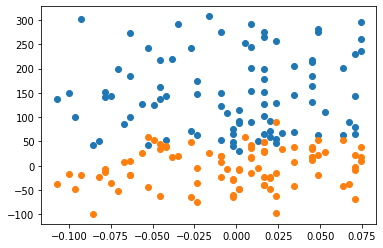

In [20]:
#visualize
plt.scatter(test_X[:,0],test_Y)
plt.scatter(test_X[:,0],prediction)
plt.show()

이번 데이터는 열을 이것저것 지워봐도 선형모델로는 학습이 안되는 것 같다!

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


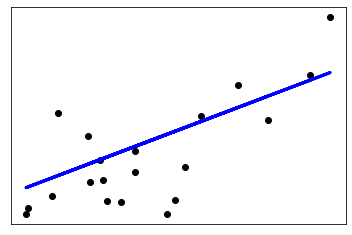

In [21]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Mean squared error: 4464.45
Coefficient of determination: 0.08


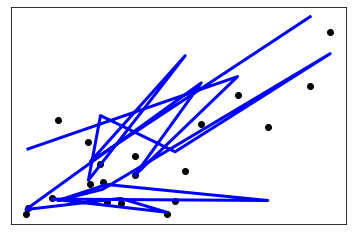

In [23]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = RandomForestClassifier(random_state=10)


# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
# print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()